In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [22]:
df=pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<Axes: xlabel='total_spend', ylabel='sales'>

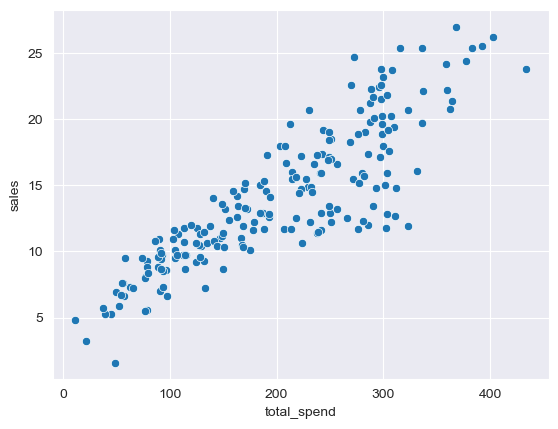

In [23]:
df['total_spend']=df['TV']+df['radio']+df['newspaper']
sns.scatterplot(x='total_spend',y='sales',data=df)

<Axes: xlabel='total_spend', ylabel='sales'>

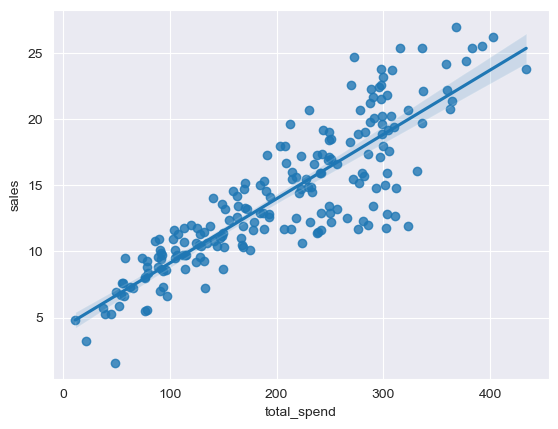

In [24]:
sns.regplot(x='total_spend',y='sales',data=df)

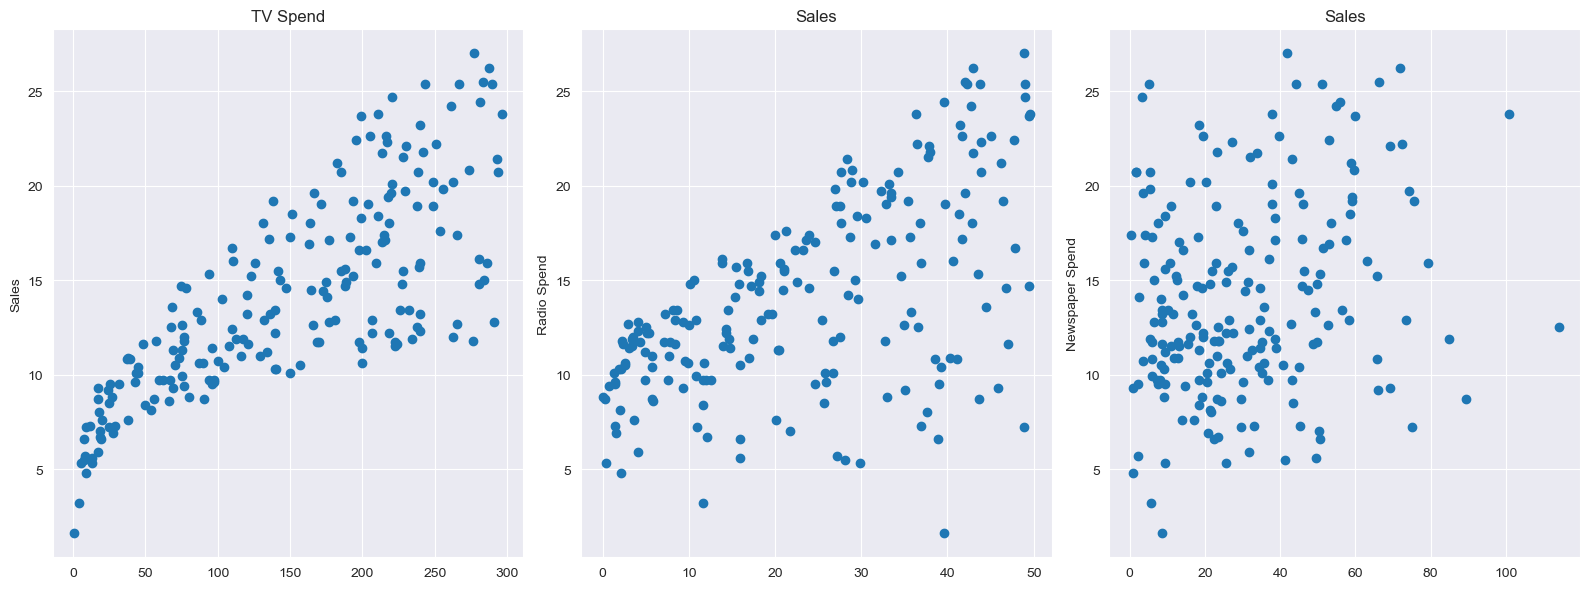

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')  

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_ylabel('Radio Spend')
axes[1].set_title('Sales')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_ylabel('Newspaper Spend')
axes[2].set_title('Sales')
plt.tight_layout()

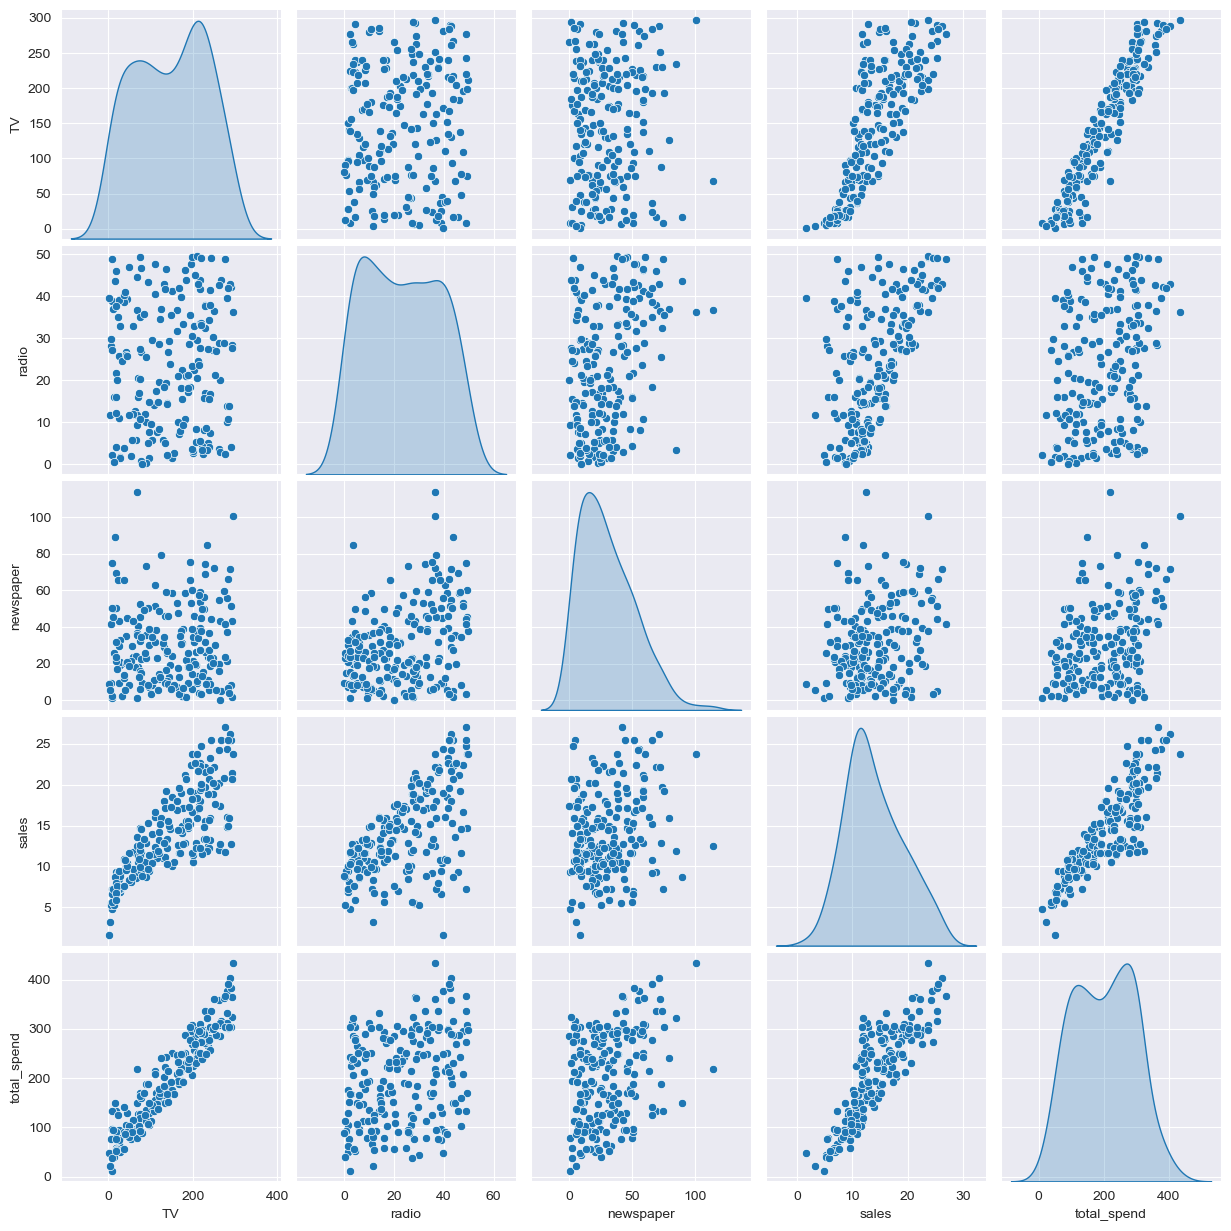

In [26]:
sns.pairplot(df,diag_kind='kde')

In [27]:
X=df.drop('sales',axis=1)
y=df['sales']

In [28]:
print(X)

        TV  radio  newspaper  total_spend
0    230.1   37.8       69.2        337.1
1     44.5   39.3       45.1        128.9
2     17.2   45.9       69.3        132.4
3    151.5   41.3       58.5        251.3
4    180.8   10.8       58.4        250.0
..     ...    ...        ...          ...
195   38.2    3.7       13.8         55.7
196   94.2    4.9        8.1        107.2
197  177.0    9.3        6.4        192.7
198  283.6   42.0       66.2        391.8
199  232.1    8.6        8.7        249.4

[200 rows x 4 columns]


In [29]:
print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [31]:
print(X_train)

        TV  radio  newspaper  total_spend
85   193.2   18.4       65.7        277.3
183  287.6   43.0       71.8        402.4
127   80.2    0.0        9.2         89.4
53   182.6   46.2       58.7        287.5
100  222.4    4.3       49.8        276.5
..     ...    ...        ...          ...
63   102.7   29.6        8.4        140.7
70   199.1   30.6       38.7        268.4
81   239.8    4.1       36.9        280.8
11   214.7   24.0        4.0        242.7
95   163.3   31.6       52.9        247.8

[140 rows x 4 columns]


In [33]:
print(y_train)

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64


In [34]:
print(X_test)

        TV  radio  newspaper  total_spend
37    74.7   49.4       45.7        169.8
109  255.4   26.9        5.5        287.8
31   112.9   17.4       38.6        168.9
89   109.8   47.8       51.4        209.0
66    31.5   24.6        2.2         58.3
119   19.4   16.0       22.3         57.7
54   262.7   28.8       15.9        307.4
74   213.4   24.6       13.1        251.1
145  140.3    1.9        9.0        151.2
142  220.5   33.2       37.9        291.6
148   38.0   40.3       11.9         90.2
112  175.7   15.4        2.4        193.5
174  222.4    3.4       13.1        238.9
55   198.9   49.4       60.0        308.3
141  193.7   35.4       75.6        304.7
149   44.7   25.8       20.6         91.1
25   262.9    3.5       19.5        285.9
34    95.7    1.4        7.4        104.5
170   50.0   11.6       18.4         80.0
39   228.0   37.7       32.0        297.7
172   19.6   20.1       17.0         56.7
153  171.3   39.7       37.7        248.7
175  276.9   48.9       41.8      

In [35]:
print(y_test)

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,root_mean_squared_error
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [53]:
test_pred=model.predict(X_test)
print(test_pred)

[15.74131332 19.61062568 11.44888935 17.00819787  9.17285676  7.01248287
 20.28992463 17.29953992  9.77584467 19.22194224 12.40503154 13.89234998
 13.72541098 21.28794031 18.42456638  9.98198406 15.55228966  7.68913693
  7.55614992 20.40311209  7.79215204 18.24214098 24.68631904 22.82199068
  7.97962085 12.65207264 21.46925937  8.05228573 12.42315981 12.50719678
 10.77757812 19.24460093 10.070269    6.70779999 17.31492147  7.76764327
  9.25393336  8.27834697 10.58105585 10.63591128 13.01002595  9.77192057
 10.21469861  8.04572042 11.5671075  10.08368001  8.99806574 16.25388914
 13.23942315 20.81493419 12.49727439 13.96615898 17.56285075 11.14537013
 12.56261468  5.50870279 23.29465134 12.62409688 18.77399978 15.18785675]


In [54]:
MAE=mean_absolute_error(y_test,test_pred)
print(MAE)

1.2137457736144817


In [55]:
MSE=mean_squared_error(y_test,test_pred)
print(MSE)

2.298716697886383


In [56]:
RMSE=np.sqrt(MSE)
print(RMSE)

1.5161519375993895


In [57]:
r2 = r2_score(y_test, test_pred)
print(f"Коэффициент детерминации (R²): {r2:.2f}")

Коэффициент детерминации (R²): 0.92


In [62]:
new_dep=pd.DataFrame({
    "TV":[56],
    "radio":[13],
    "newspaper":[12],
    "total_spend":[81]
})

In [63]:
new_predict=model.predict(new_dep)
print(new_predict[0])

8.088983477130018
